## Learning Curves

In [1]:
cd ..

/home/jovyan/Ames_Housing_Data/ipynb


In [2]:
cd ..

/home/jovyan/Ames_Housing_Data


In [3]:
!pip --quiet install mglearn

In [4]:
import mglearn
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler, scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
run src/load_data_2.py

In [6]:
housing_df = load_train_data()
clean_data(housing_df)
housing_df.shape

(1423, 78)

#### Split features & target

In [7]:
features, target = split_features_target(housing_df)

#### Scale numerical features & One hot encode the categorical features

In [8]:
numerical_features, categorical_features = split_numerical_categorical(features)

scaled_numerical_features = log_scale_features(numerical_features)
categorical_features = one_hot_encode_features(categorical_features)

scaled_features_df = scaled_numerical_features.merge(categorical_features, left_index=True, right_index=True, how='left')
unscaled_features_df = numerical_features.merge(categorical_features, left_index=True, right_index=True, how='left')

In [9]:
target = housing_df["SalePrice"]

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_features_df, target, test_size = .25, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(unscaled_features_df, target, test_size = .25, random_state = 42)

### (1) Ridge

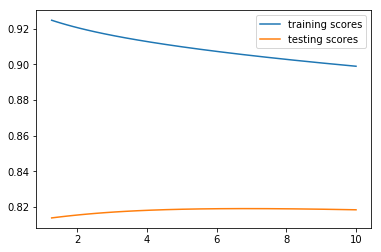

In [10]:
train_scores = list()
test_scores = list()
for alpha in np.logspace(.1, 1.2, 22):    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_scores.append(ridge.score(X_train_scaled, y_train))
    test_scores.append(ridge.score(X_test_scaled, y_test))

plt.plot(np.logspace(.1, 1, 22), train_scores, label='training scores')
plt.plot(np.logspace(.1, 1, 22), test_scores, label='testing scores')
plt.legend();

### (2) Lasso

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


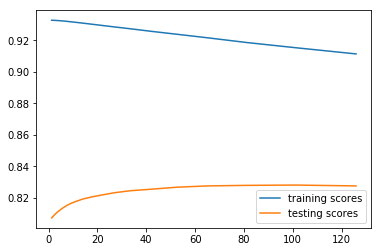

In [11]:
train_scores = list()
test_scores = list()
for alpha in np.logspace(.1, 2.1, 22):    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    train_scores.append(lasso.score(X_train_scaled, y_train))
    test_scores.append(lasso.score(X_test_scaled, y_test))

plt.plot(np.logspace(.1, 2.1, 22), train_scores, label='training scores')
plt.plot(np.logspace(.1, 2.1, 22), test_scores, label='testing scores')
plt.legend();

### (3) KNN

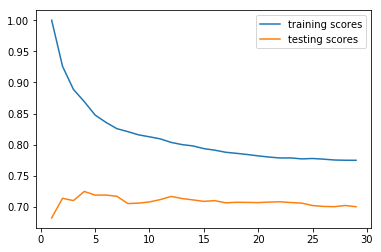

In [12]:
train_scores = list()
test_scores = list()
for n in range(1, 30, 1):    
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

plt.plot(range(1, 30, 1), train_scores, label='training scores')
plt.plot(range(1, 30, 1), test_scores, label='testing scores')
plt.legend();